In [1]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


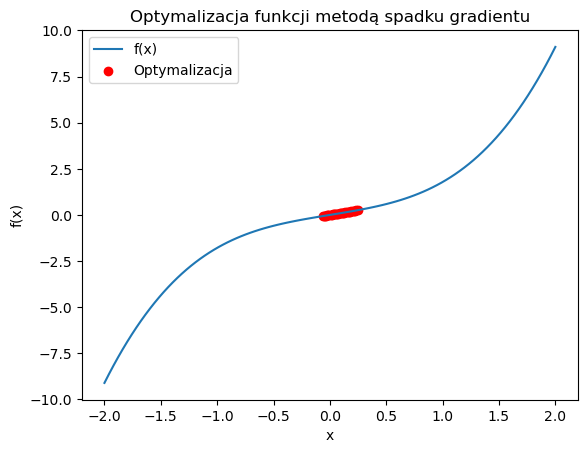

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.6563 - loss: 1.2269 - val_accuracy: 0.6333 - val_loss: 1.1595
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6825 - loss: 1.0654 - val_accuracy: 0.6333 - val_loss: 0.9977
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6640 - loss: 0.9468 - val_accuracy: 0.7000 - val_loss: 0.8683
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7360 - loss: 0.8192 - val_accuracy: 0.8000 - val_loss: 0.7565
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6975 - loss: 0.7764 - val_accuracy: 0.8333 - val_loss: 0.6658
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7124 - loss: 0.6970 - val_accuracy: 0.8667 - val_loss: 0.6004
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7824 - loss: 0.6069 - val_accuracy: 0.8667 - val_loss: 0.5445
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7960 - loss: 0.5778 - val_accuracy: 0.8667 - v

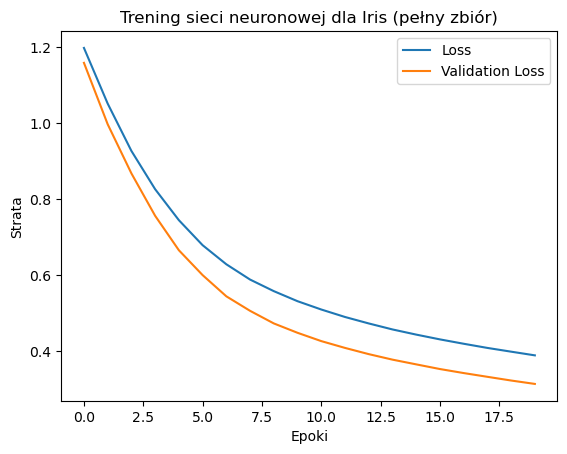

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.8047 - loss: 0.5480 - val_accuracy: 0.8774 - val_loss: 0.3394
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8993 - loss: 0.2794 - val_accuracy: 0.8923 - val_loss: 0.2876
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9160 - loss: 0.2307 - val_accuracy: 0.9018 - val_loss: 0.2615
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9262 - loss: 0.2021 - val_accuracy: 0.9012 - val_loss: 0.2632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9351 - loss: 0.1763 - val_accuracy: 0.9082 - val_loss: 0.2540


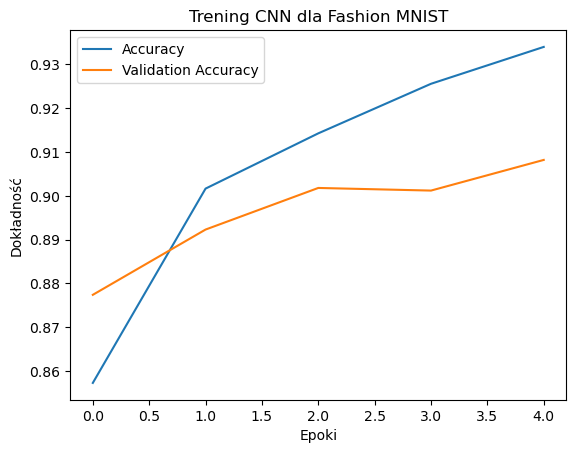

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input
from tensorflow.keras.utils import to_categorical

# 1. Optymalizacja f(x) = arctan(x) + x^3 metodą spadku gradientu
def f(x):
    return np.arctan(x) + x**3

def grad_f(x):
    return (1 / (1 + x**2)) + 3*x**2

# Gradient Descent
x_init = np.random.uniform(-2, 2)  # Ograniczamy przedział początkowy
learning_rate = 0.01  # Zmniejszamy współczynnik uczenia
iterations = 30  # Redukujemy liczbę iteracji
x_vals = [x_init]

for _ in range(iterations):
    grad = grad_f(x_vals[-1])
    if np.abs(grad) > 1e6:  # Zabezpieczenie przed przepełnieniem
        break
    x_new = x_vals[-1] - learning_rate * grad
    x_vals.append(x_new)

x_plot = np.linspace(-2, 2, 100)
plt.plot(x_plot, f(x_plot), label='f(x)')
plt.scatter(x_vals, f(np.array(x_vals)), color='red', label='Optymalizacja')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Optymalizacja funkcji metodą spadku gradientu")
plt.show()

# 2. Sieć neuronowa do klasyfikacji pełnego zbioru Iris
dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

model = Sequential([
    Input(shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=5, verbose=1, validation_data=(X_test, y_test))

# Wizualizacja procesu uczenia
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend()
plt.title("Trening sieci neuronowej dla Iris (pełny zbiór)")
plt.show()

# 3. Sieć CNN dla Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

cnn_model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Wizualizacja treningu CNN
plt.plot(cnn_history.history['accuracy'], label='Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend()
plt.title("Trening CNN dla Fashion MNIST")
plt.show()